# Rejection ABC

This example shows you how to perform rejection ABC on a time series from the stochastic degradation model.

In [1]:
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.StochasticDegradationModel()

# Create some toy data
real_parameters = model.suggested_parameters()
times = np.linspace(0, 10, 100)
values = model.simulate(real_parameters, times)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a uniform prior parameter
log_prior = pints.UniformLogPrior(
    [0.0],
    [0.3]
)

# Set the error measure to be used to compare simulated to observed data
error_measure = pints.RootMeanSquaredError(problem)

Fit using ABC rejection.

In [2]:
abc = pints.ABCController(error_measure, log_prior)

# set threshold
abc.sampler().set_threshold(1)

# set target number of samples
abc.set_n_target(200)

# log to screen
abc.set_log_to_screen(True)

# Run!
print('Running...')
samples = abc.run()
print('Done!')

Running...
Using Rejection ABC
Running in sequential mode.
Iter. Eval. Acceptance rate Time m:s
1     211    0.00473933649    0:00.1
2     294    0.00680272109    0:00.1
3     310    0.00967741935    0:00.1
20    1819   0.0109950522     0:00.5
40    4076   0.00981354269    0:01.1
60    6448   0.00930521092    0:01.7
80    8575   0.00932944606    0:02.2
100   11016  0.00907770516    0:02.7
120   14022  0.00855798032    0:03.5
140   15872  0.00882056452    0:04.0
160   17888  0.00894454383    0:04.6
180   20213  0.00890516005    0:05.3
200   22384  0.00893495354    0:06.0
Halting: target number of samples (200) reached.
Done!


Plot approximate posterior vs actual parameter value.

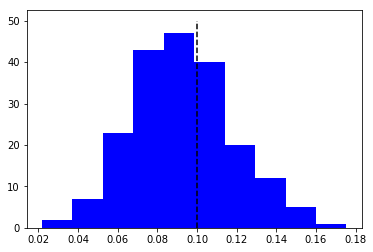

In [3]:
plt.hist(samples[:,0], color="blue")
plt.vlines(x=model.suggested_parameters(), linestyles='dashed', ymin=0, ymax=50)
plt.show()